# **Environment Set-Up...**

In [1]:
# Mount Drive...
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# import libraries...
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **Data Preparation and Visualization...**

In [3]:
# load dataset...
file_path = ""

credit_df = pd.read_excel(file_path)
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### **DATASET DESCRIPTION**

Dataset Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

### **Content**
There are 25 variables:


* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_1: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)



In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [ ]:
# Count Null Values...
credit_df.isnull().sum().sum()

0

In [ ]:
# cleaning the data...
df_clean = credit_df[
    credit_df["PAY_1"] != "Not available"
]  #  Removing rows where 'PAY_1' has 'Not available'...

In [ ]:
# check if the rows are removed...
remaining_na = df_clean.isin(["Not available"]).any().sum()
remaining_na, df_clean.shape

(0, (26979, 25))

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26979 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26979 non-null  object
 1   LIMIT_BAL                   26979 non-null  int64 
 2   SEX                         26979 non-null  int64 
 3   EDUCATION                   26979 non-null  int64 
 4   MARRIAGE                    26979 non-null  int64 
 5   AGE                         26979 non-null  int64 
 6   PAY_1                       26979 non-null  object
 7   PAY_2                       26979 non-null  int64 
 8   PAY_3                       26979 non-null  int64 
 9   PAY_4                       26979 non-null  int64 
 10  PAY_5                       26979 non-null  int64 
 11  PAY_6                       26979 non-null  int64 
 12  BILL_AMT1                   26979 non-null  int64 
 13  BILL_AMT2                   26979 non-null  in

In [ ]:
# Description for numerical columns...
df_clean.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,...,26979.000000,26979.000000,26979.000000,26979.000000,2.697900e+04,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000
mean,165958.474369,1.584343,1.831462,1.532525,35.090663,-0.131806,-0.165721,-0.222395,-0.266615,-0.290152,...,42832.880537,39867.158790,38435.803996,5637.486304,5.812443e+03,5198.106194,4829.988769,4787.175803,5196.453797,0.219208
std,130333.534550,0.515992,0.809597,0.545036,9.934731,1.191708,1.192280,1.161310,1.125481,1.143929,...,64068.282338,60505.864984,59232.062399,16612.924086,2.109956e+04,17173.642847,15871.606075,15230.958680,17541.304126,0.413717
min,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2008.500000,1496.000000,1052.000000,827.000000,6.940000e+02,363.000000,209.000000,155.000000,5.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18703.000000,17741.000000,16560.000000,2091.000000,2.000000e+03,1791.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,53678.000000,49788.000000,48804.000000,5006.000000,5.000000e+03,4500.000000,4000.000000,4003.000000,4000.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,706864.000000,823540.000000,699944.000000,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000,1.000000


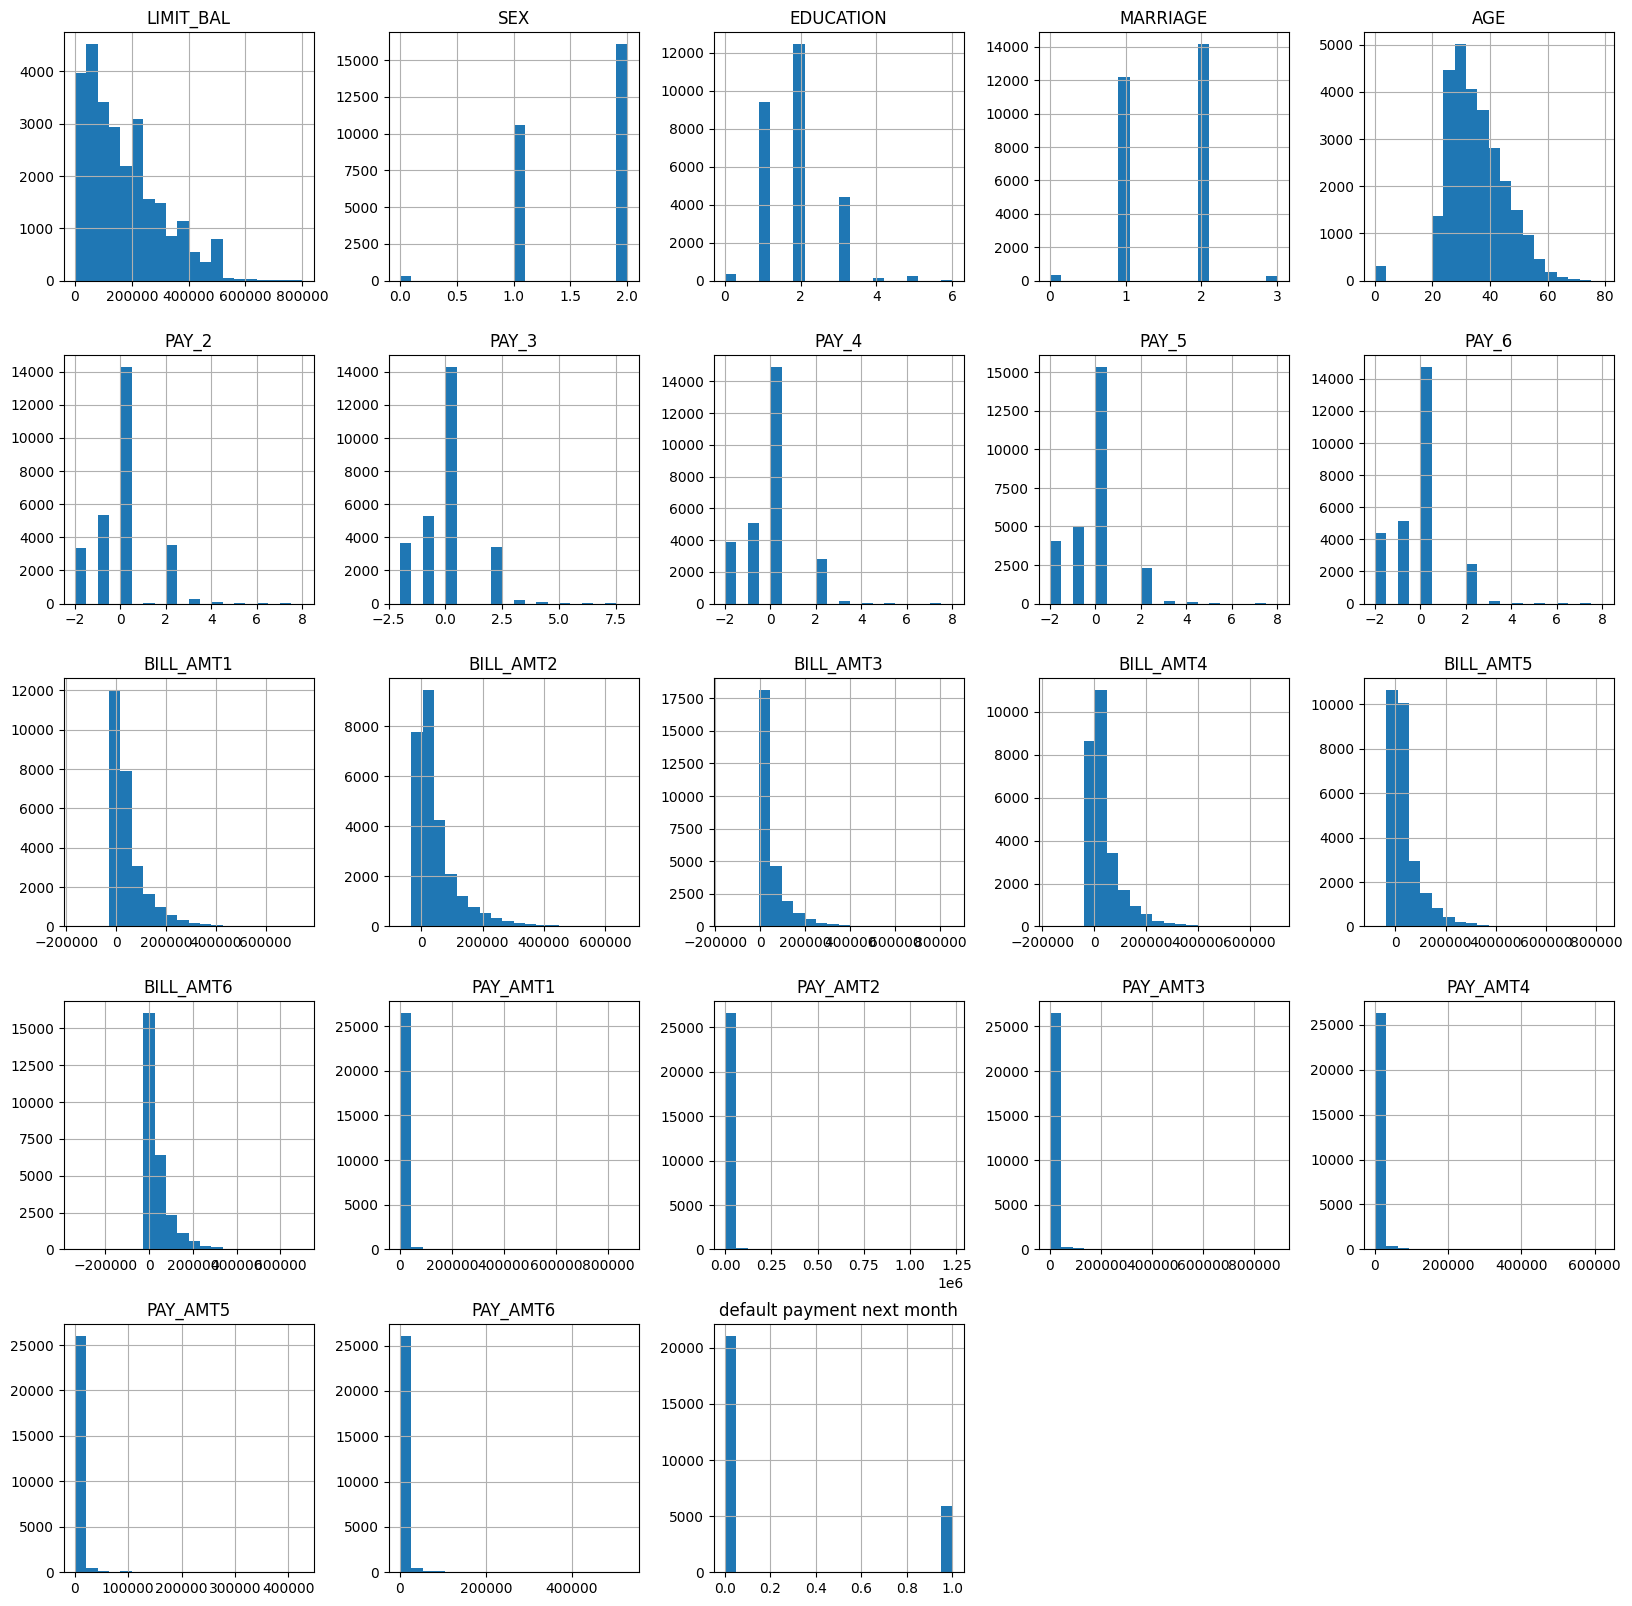

In [ ]:
# visualize dataset...
df_clean.hist(figsize=(20, 20), bins=20)

In [ ]:
# drop 'ID' Column...
df_clean.drop(["ID"], axis=1, inplace=True)

<ipython-input-11-06e36d171281>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(['ID'], axis=1, inplace=True)


In [ ]:
# let's assess the potential number of customers at risk of credit card payment default...
cc_default = df_clean[df_clean["default payment next month"] == 1]
cc_notdefault = df_clean[df_clean["default payment next month"] == 0]

print("Total Customers : ", len(df_clean))
print("Number of customers, defaulting on credit card payments : ", len(cc_default))
print(
    "Percentage of customers, defaulting on credit card payments : ",
    len(cc_default) / len(df_clean) * 100,
    "%",
)

print(
    "Number of customers with no credit card payment defaults (paid their balance) : ",
    len(cc_notdefault),
)
print(
    "Percentage of customers with no credit card payments defaults (paid their balance) : {:.2f}%".format(
        len(cc_notdefault) / len(df_clean) * 100
    )
)

Total Customers :  26979
Number of customers, defaulting on credit card payments :  5914
Percentage of customers, defaulting on credit card payments :  21.920753178398016 %
Number of customers with no credit card payment defaults (paid their balance) :  21065
Percentage of customers with no credit card payments defaults (paid their balance) : 78.08%


In [ ]:
# compare the average and standard deviation of retained and departed customers...
cc_default.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,5914.000000,5914.000000,5914.000000,5914.000000,5914.000000,5914.000000,5914.000000,5914.000000,5914.000000,5914.000000,...,5914.000000,5914.000000,5914.000000,5914.000000,5914.000000,5914.000000,5914.000000,5914.000000,5914.000000,5914.0
mean,130363.151843,1.566452,1.896517,1.528069,35.752959,0.458573,0.367095,0.256003,0.164694,0.116165,...,41972.498309,39570.215590,38191.425431,3438.477849,3435.116672,3383.490869,3256.005580,3218.955529,3446.373520,1.0
std,115913.417777,0.495606,0.733424,0.525655,9.720185,1.502709,1.502691,1.511577,1.483410,1.489304,...,64961.615924,62099.335335,60005.020999,9462.546098,12263.121112,13258.355802,11659.770377,11640.756566,13242.844509,0.0
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-65167.000000,-46627.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2073.750000,1515.250000,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,90000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19004.500000,18351.500000,17902.500000,1647.500000,1517.000000,1230.000000,1000.000000,1000.000000,1000.000000,1.0
75%,200000.000000,2.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,0.000000,0.000000,...,49719.250000,47498.000000,47089.250000,3500.000000,3300.000000,3000.000000,3000.000000,3000.000000,3000.000000,1.0
max,740000.000000,2.000000,6.000000,3.000000,75.000000,7.000000,8.000000,8.000000,8.000000,8.000000,...,548020.000000,547880.000000,514975.000000,300000.000000,358689.000000,508229.000000,432130.000000,330982.000000,345293.000000,1.0


In [ ]:
cc_notdefault.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,21065.000000,21065.000000,21065.000000,21065.000000,21065.000000,21065.000000,21065.00000,21065.000000,21065.000000,21065.000000,...,21065.000000,21065.000000,21065.000000,21065.000000,2.106500e+04,21065.000000,21065.000000,21065.000000,21065.000000,21065.0
mean,175951.863280,1.589366,1.813197,1.533776,34.904723,-0.297555,-0.31531,-0.356705,-0.387705,-0.404225,...,43074.432898,39950.525611,38504.413292,6254.858058,6.479878e+03,5707.559554,5271.884643,5227.453738,5687.788939,0.0
std,132396.473538,0.521473,0.828825,0.550361,9.986470,1.029404,1.04148,1.001796,0.968371,0.996981,...,63814.702661,60052.135312,59014.489979,18072.156642,2.293332e+04,18088.981550,16839.837910,16068.317045,18540.663152,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.00000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,60000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,...,2001.000000,1495.000000,1037.000000,1088.000000,1.000000e+03,500.000000,335.000000,308.000000,200.000000,0.0
50%,150000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,18654.000000,17391.000000,15944.000000,2385.000000,2.198000e+03,2000.000000,1682.000000,1700.000000,1654.000000,0.0
75%,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,55419.000000,50720.000000,49452.000000,5590.000000,5.212000e+03,5000.000000,4519.000000,4537.000000,4500.000000,0.0
max,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.00000,8.000000,7.000000,7.000000,...,706864.000000,823540.000000,699944.000000,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000,0.0


<ipython-input-15-1f5f7674edee>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_clean.corr(), annot=True);


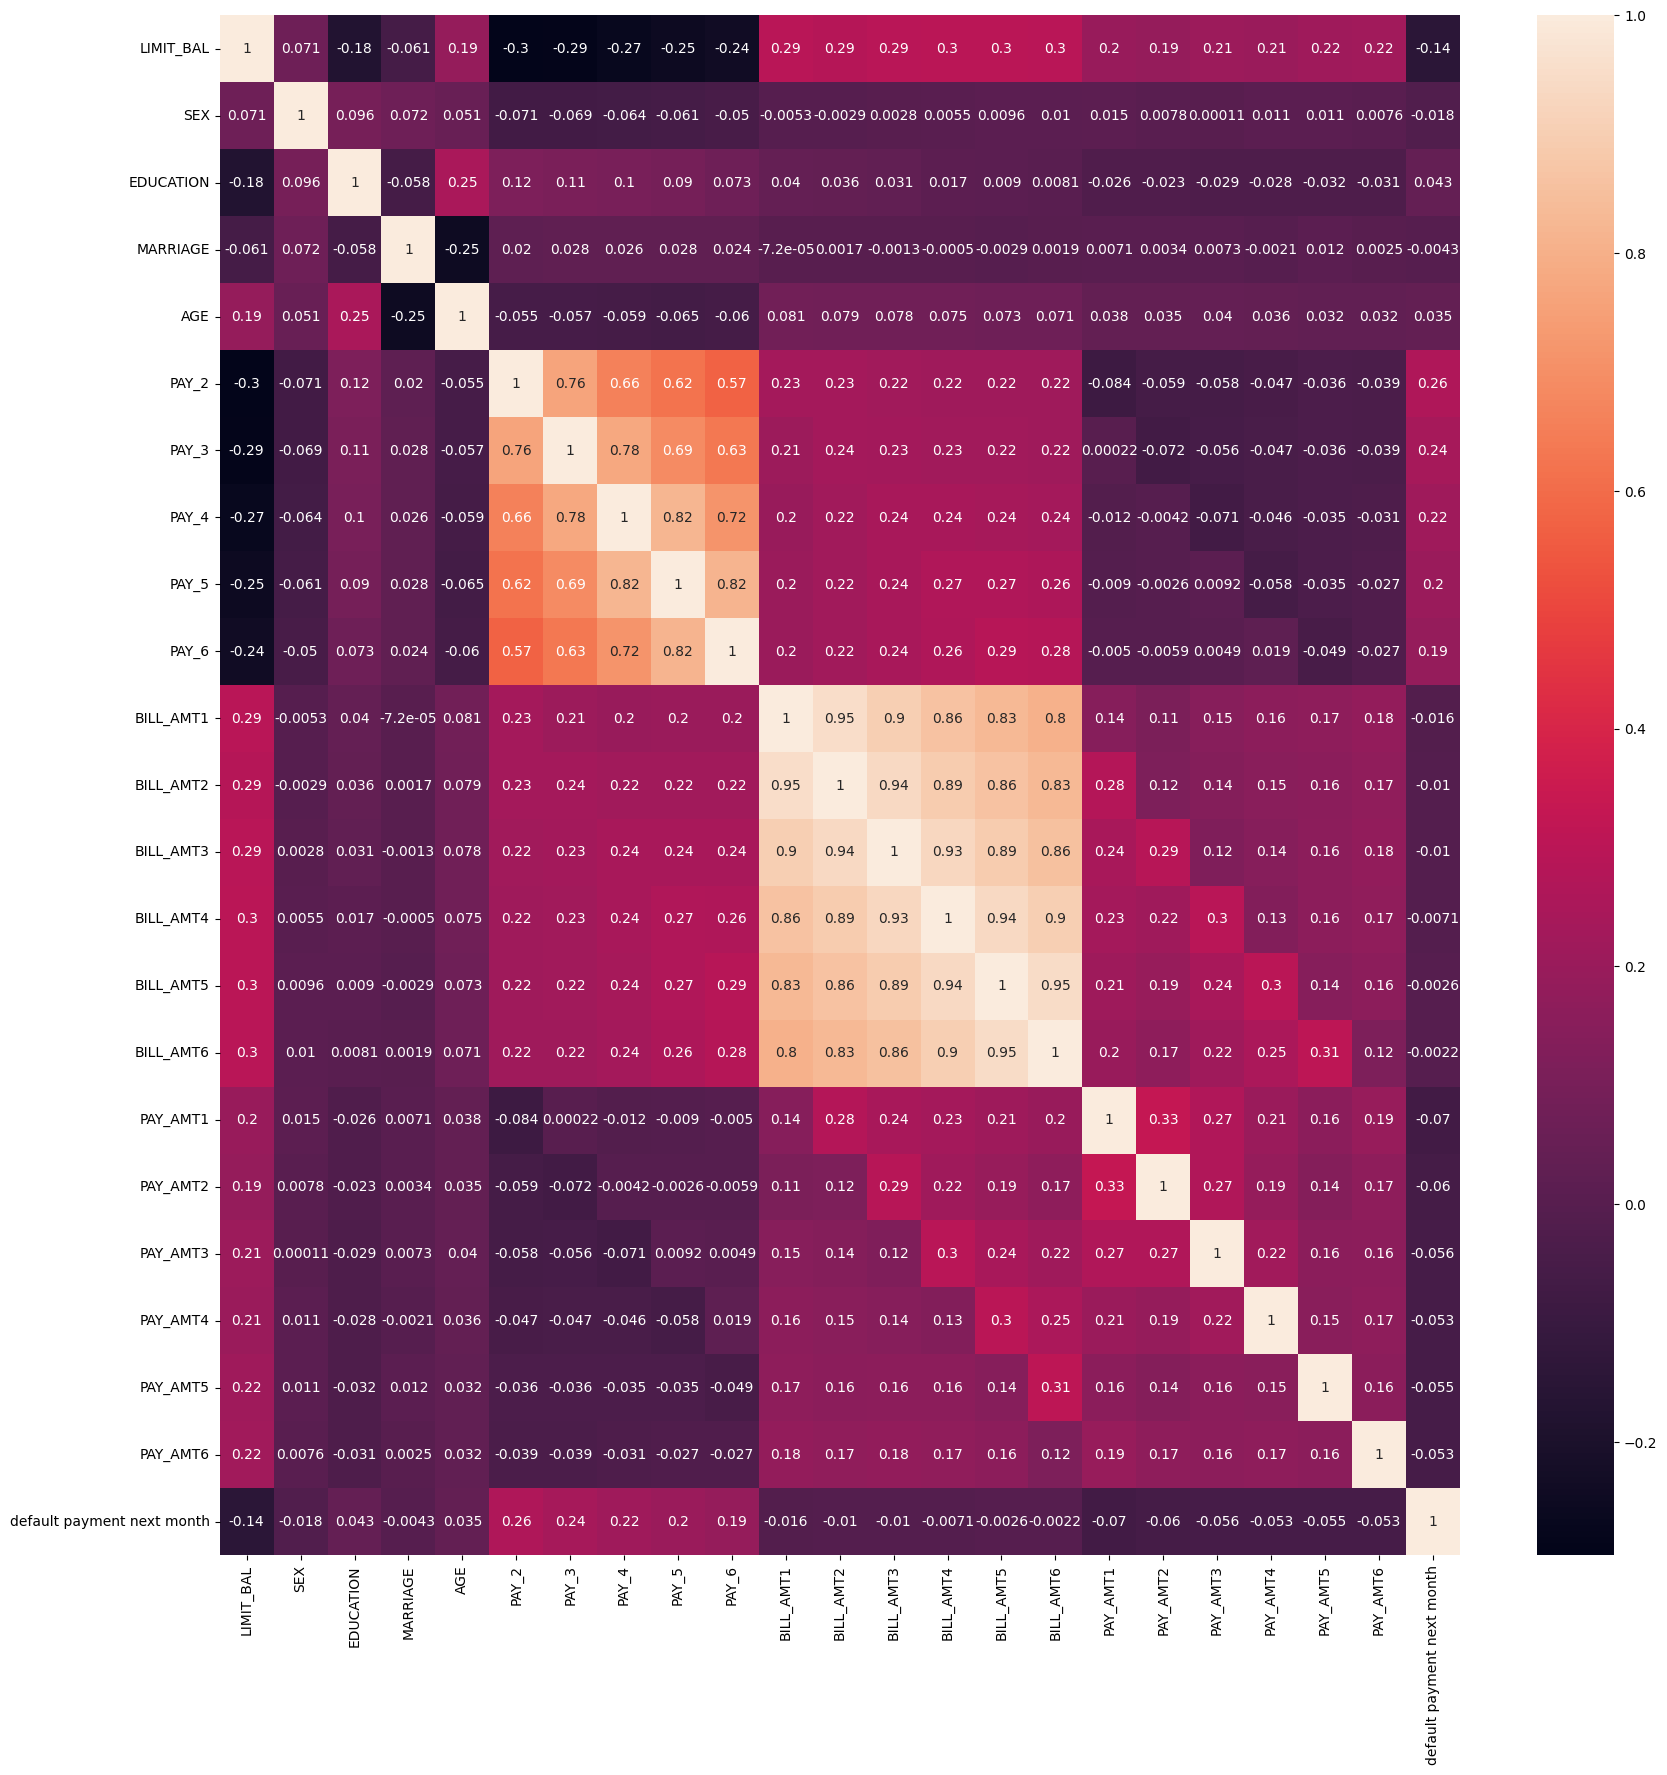

In [ ]:
# heatmap plot...
plt.figure(figsize=(20, 20))
sns.heatmap(df_clean.corr(), annot=True)

**OBSERVATIONS FROM ABOVE PLOT...**


*   BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, & BILL_AMT6 are strongly correlated
* PAY_0, PAY_2, PAY_3, PAY_4, PAY_5 & PAY_6 are highly correlated
* There is a weak correlation between PAY and BILL_AMT (all columns)
* There is a slight -ve correlation between PAY_ and PAY_AMT (all columns)
* There is -ve corr of LIMIT_BAL with PAY_0, PAY_2, PAY_3, PAY_4, PAY_5 & PAY_6

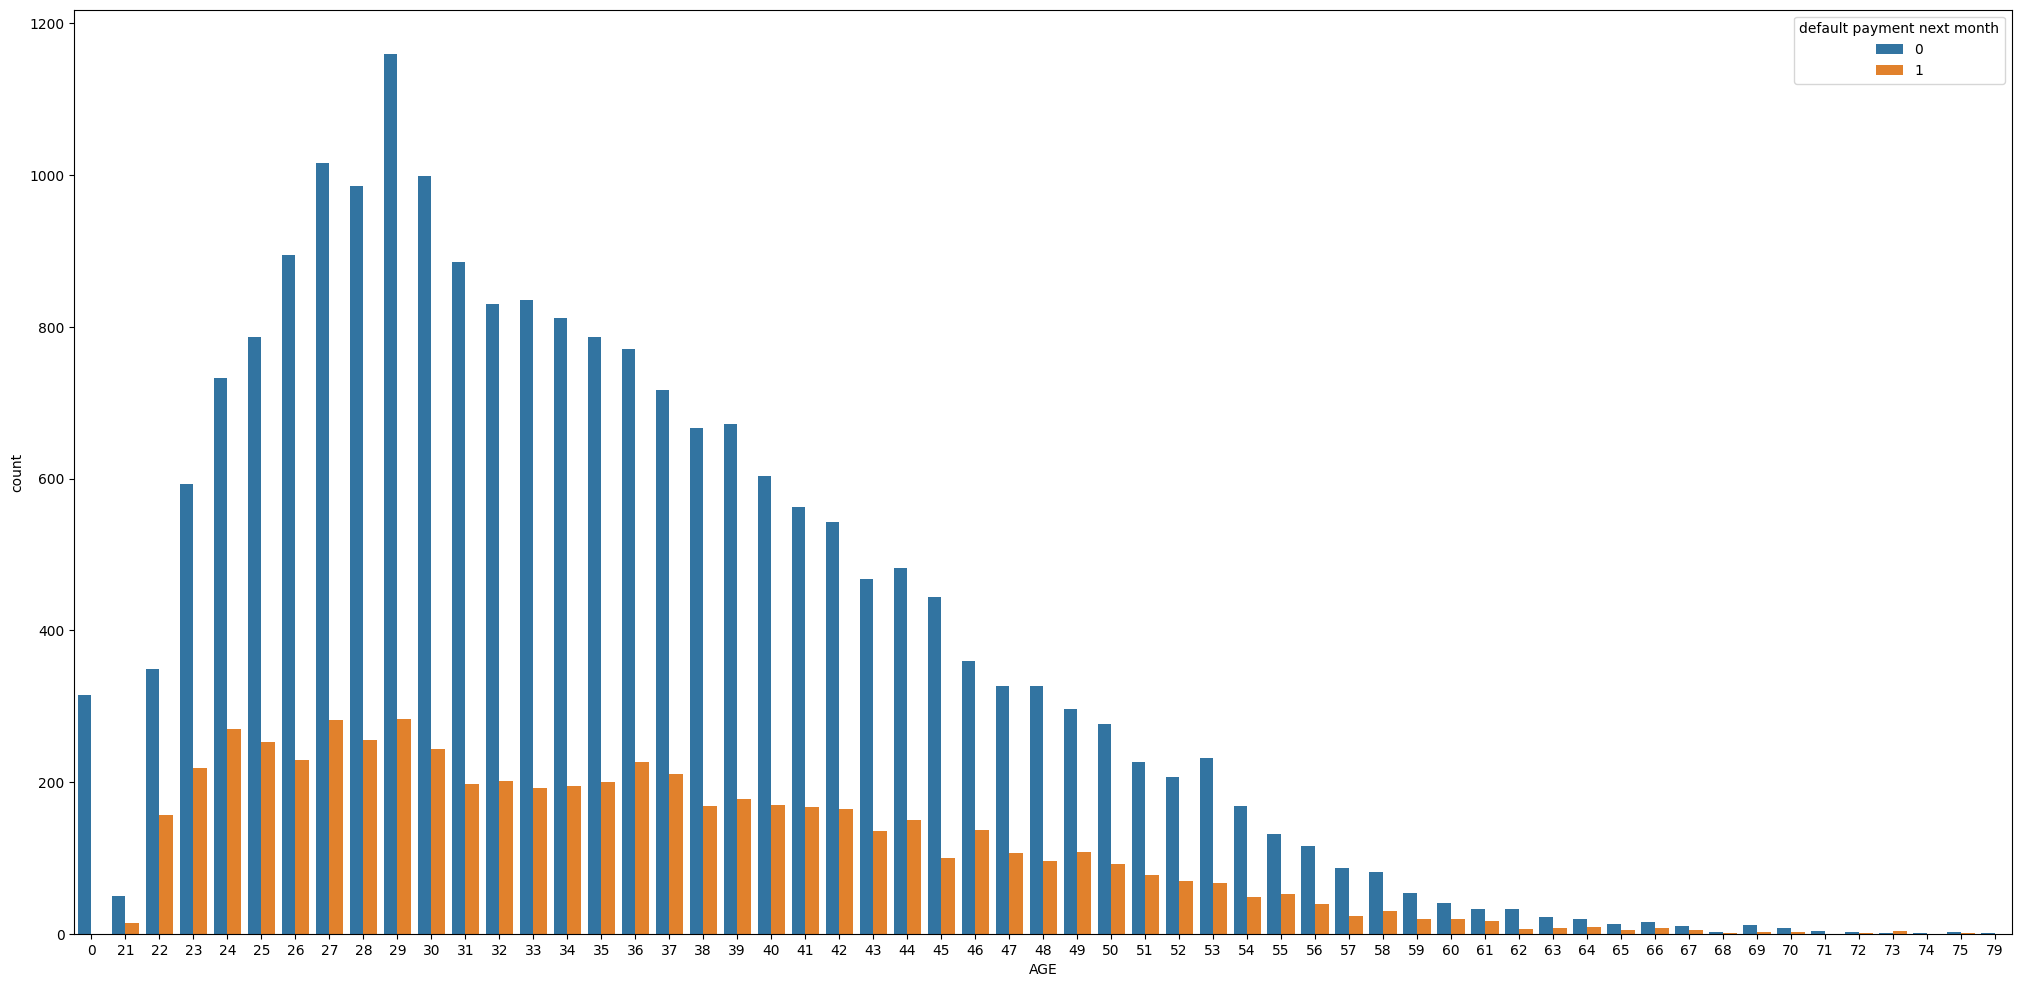

In [ ]:
plt.figure(figsize=(25, 12))
sns.countplot(data=df_clean, x="AGE", hue="default payment next month")

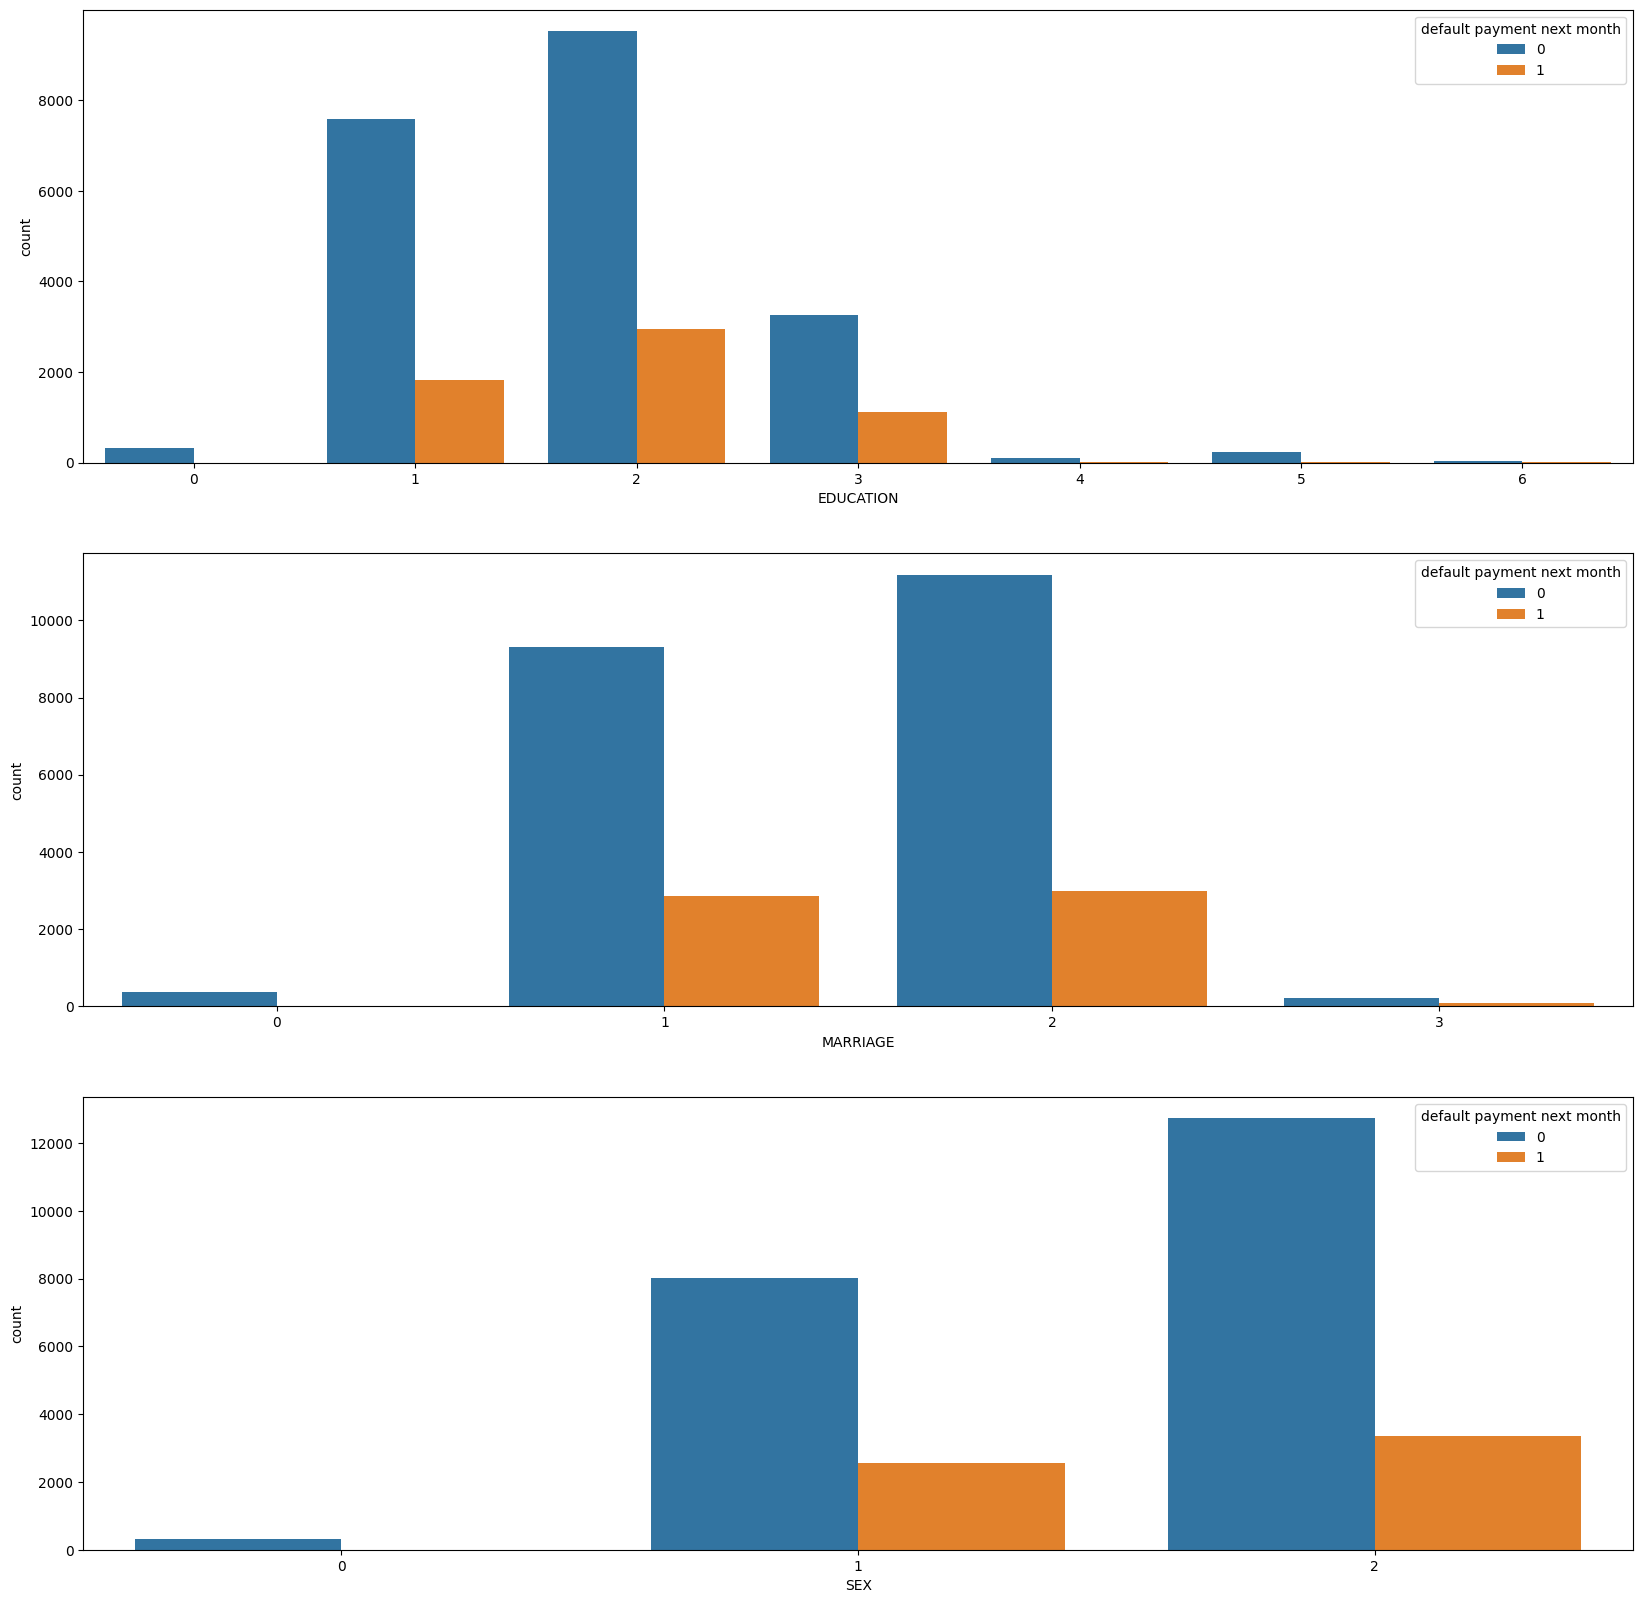

In [ ]:
plt.figure(figsize=(20, 20))
plt.subplot(311)
sns.countplot(data=df_clean, x="EDUCATION", hue="default payment next month")
plt.subplot(312)
sns.countplot(data=df_clean, x="MARRIAGE", hue="default payment next month")
plt.subplot(313)
sns.countplot(data=df_clean, x="SEX", hue="default payment next month")

**OBSERVATIONS FROM ABOVE PLOT...**
* Majority of defaulters are aged 23-30, with a noticeable increase in the 34-38 age group
* The majority of defaulters have an educational background of 1=graduate school or 2=university
* The majority of defaulters in marital status are categorized as 1=married and 2=single
* **While** there are more female defaulters than males, it's noteworthy that a higher number of females also pay their bills on time

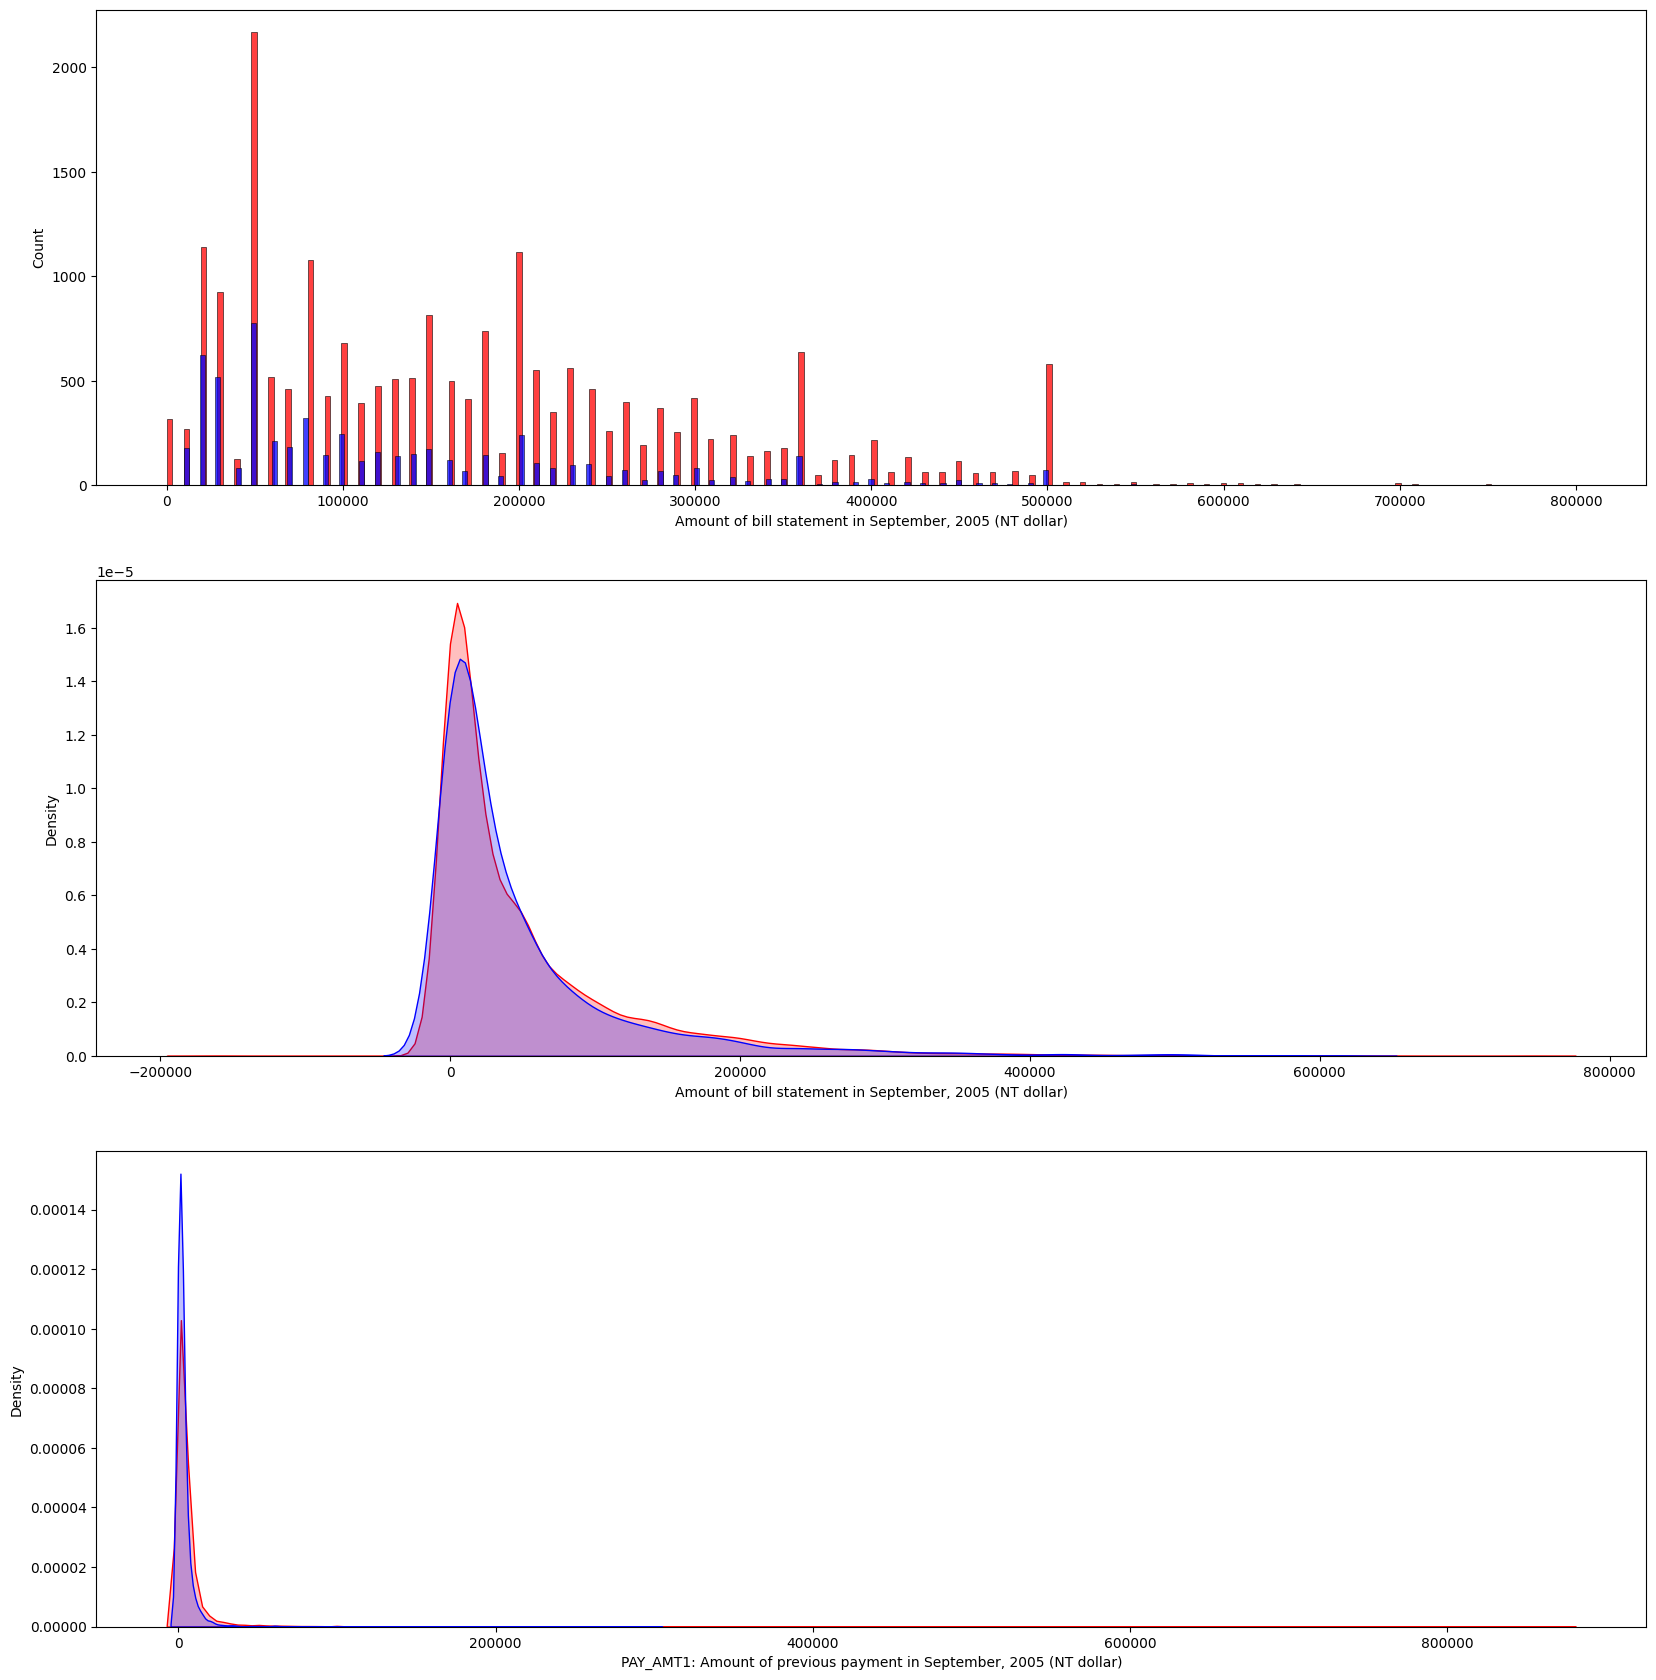

In [ ]:
# KDE (Kernel Density Estimate) visualizes the Probability Density of a continuous variable, describing the probability density at various values in that variable...

plt.figure(figsize=(20, 21))

plt.subplot(311)
sns.histplot(cc_notdefault["LIMIT_BAL"], bins=250, color="r")
sns.histplot(cc_default["LIMIT_BAL"], bins=250, color="b")

plt.xlabel("Amount of bill statement in September, 2005 (NT dollar)")

plt.subplot(312)
sns.kdeplot(
    cc_notdefault["BILL_AMT1"],
    label="Customers who did not default (paid balance)",
    fill=True,
    color="r",
)
sns.kdeplot(
    cc_default["BILL_AMT1"],
    label="Customers who defaulted (did not pay balance)",
    fill=True,
    color="b",
)

plt.xlabel("Amount of bill statement in September, 2005 (NT dollar)")

plt.subplot(313)
sns.kdeplot(
    cc_notdefault["PAY_AMT1"],
    label="Customers who did not default (paid balance)",
    fill=True,
    color="r",
)
sns.kdeplot(
    cc_default["PAY_AMT1"],
    label="Customers who defaulted (did not pay balance)",
    fill=True,
    color="b",
)

plt.xlabel("PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)")

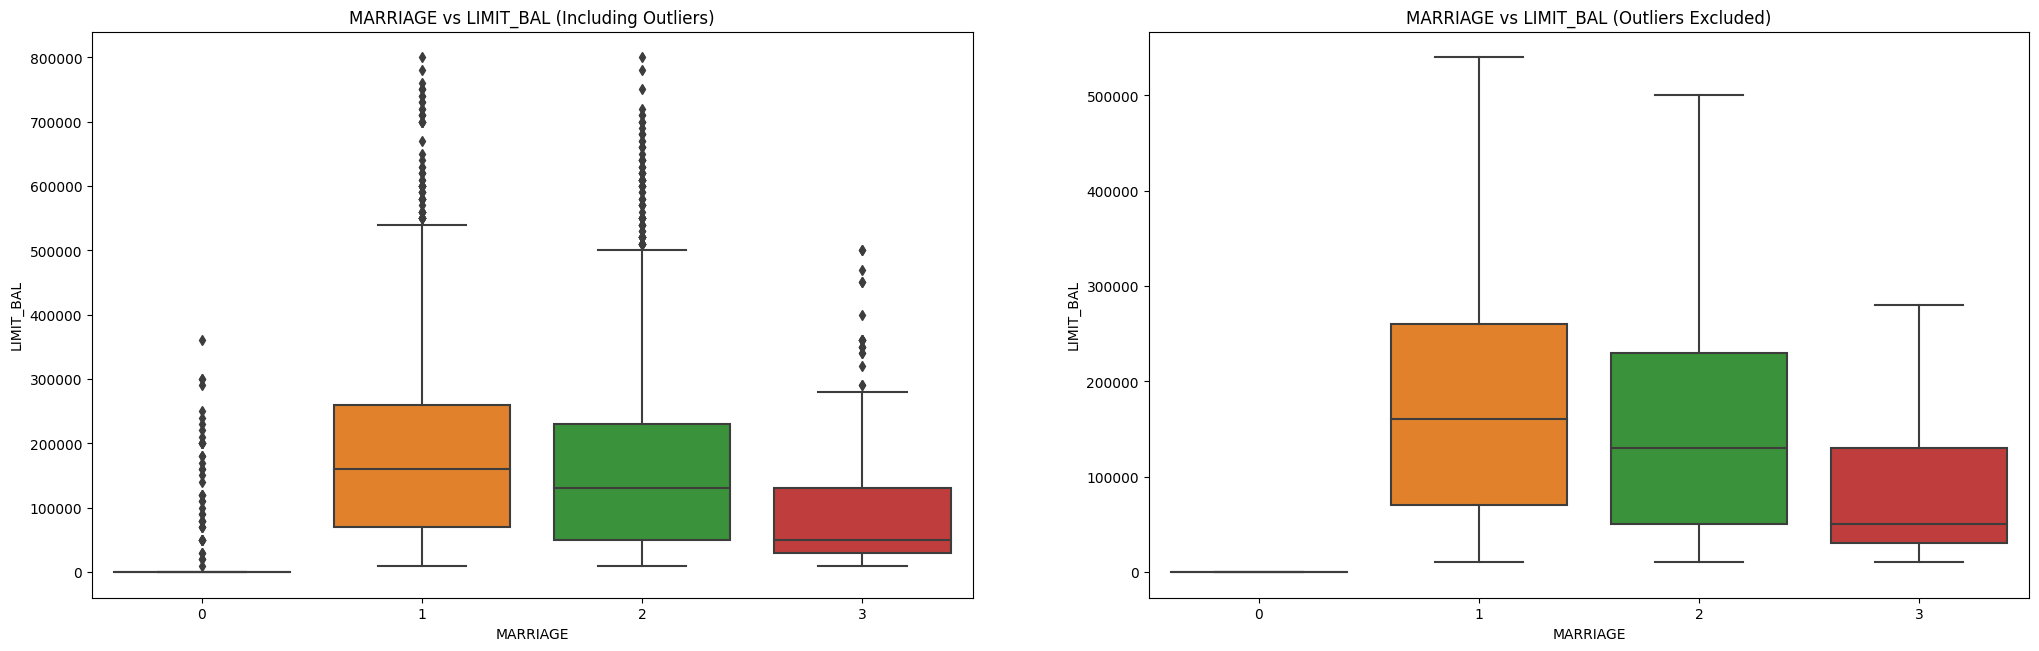

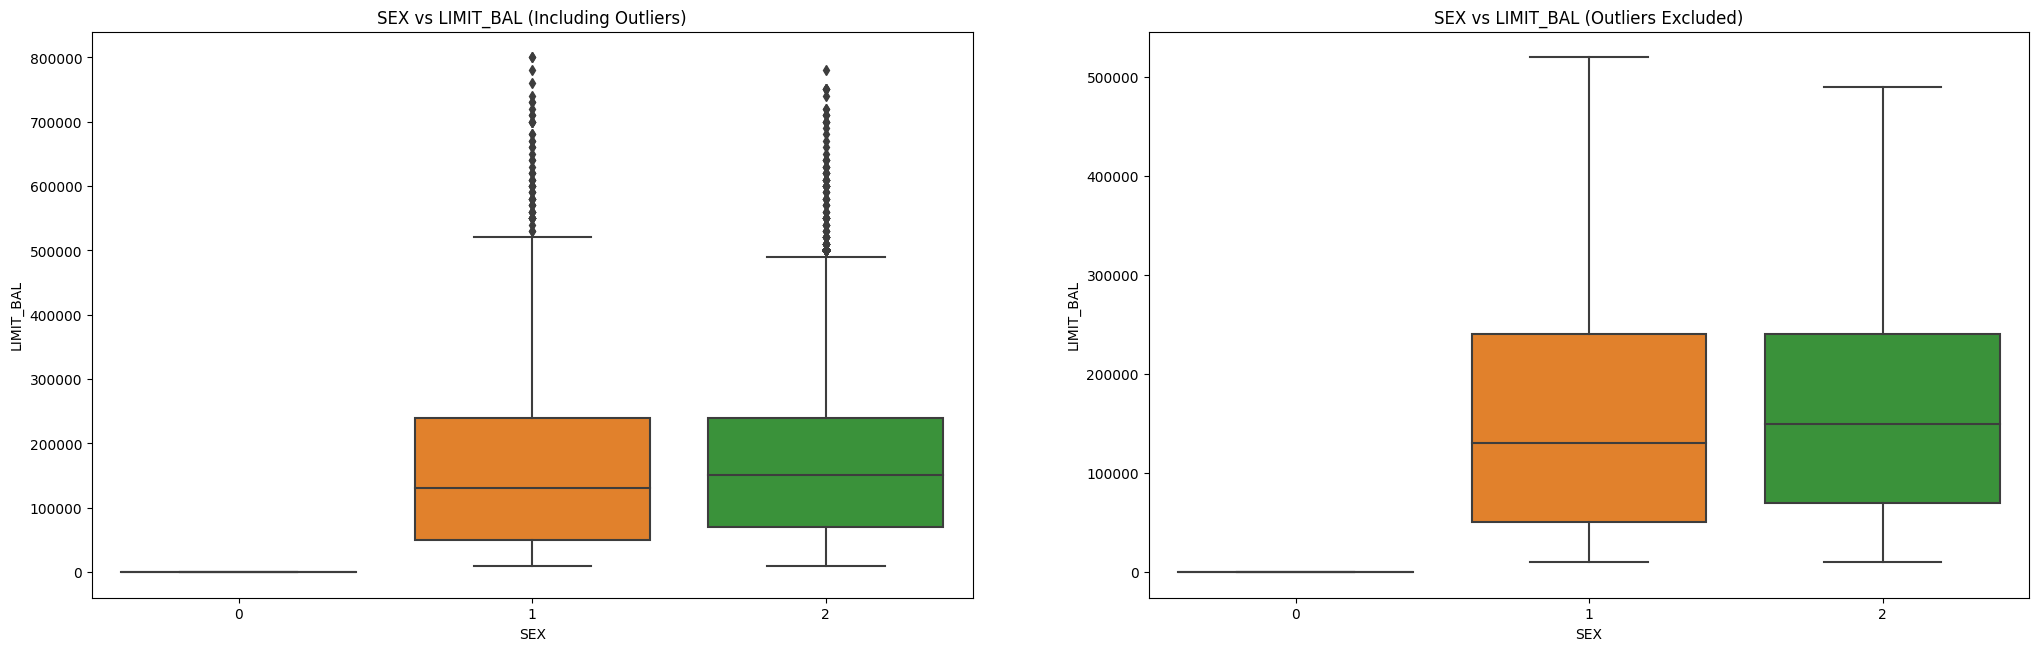

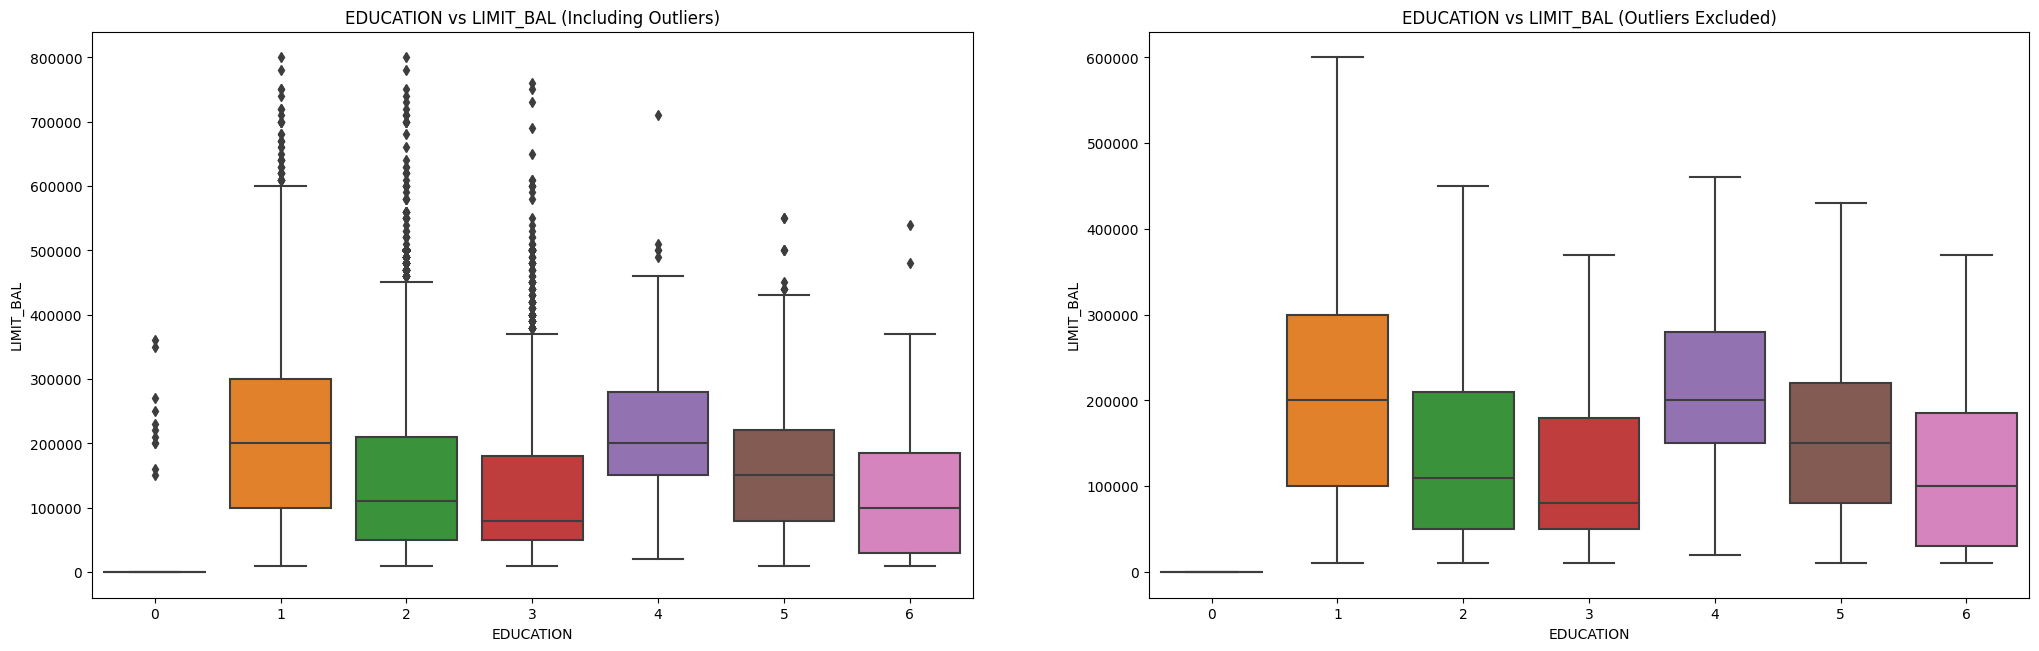

In [ ]:
# boxplots with and without outliers...
axs = 1
for i in ['MARRIAGE', 'SEX', 'EDUCATION']:
    plt.figure(figsize=(25,25))
    plt.subplot(3, 2, axs)
    sns.boxplot(data=df_clean, y='LIMIT_BAL', x=i)
    plt.title(i + ' vs LIMIT_BAL (Including Outliers)')

    plt.subplot(3, 2, axs+1)
    sns.boxplot(data=df_clean, y='LIMIT_BAL', x=i, showfliers=False)
    plt.title(i + ' vs LIMIT_BAL (Outliers Excluded)')
    axs += 2

plt.show()

**OBSERVATIONS FROM ABOVE PLOT...**
- Married customers tend to have higher credit limits.
- Gender appears to have minimal impact on credit limits.
- Customers in the "EDUCATED" (1) and "OTHERS" (4) classes exhibit higher credit limits.

# **Load Data For Models...**

In [ ]:
# load dataset...
load_file = ""

credit_df = pd.read_excel(load_file)
credit_df.head()

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26979 entries, 0 to 26978
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Unnamed: 0                  26979 non-null  int64
 1   LIMIT_BAL                   26979 non-null  int64
 2   SEX                         26979 non-null  int64
 3   EDUCATION                   26979 non-null  int64
 4   MARRIAGE                    26979 non-null  int64
 5   AGE                         26979 non-null  int64
 6   PAY_1                       26979 non-null  int64
 7   PAY_2                       26979 non-null  int64
 8   PAY_3                       26979 non-null  int64
 9   PAY_4                       26979 non-null  int64
 10  PAY_5                       26979 non-null  int64
 11  PAY_6                       26979 non-null  int64
 12  BILL_AMT1                   26979 non-null  int64
 13  BILL_AMT2                   26979 non-null  int64
 14  BILL_A

In [ ]:
# target values...
y = credit_df["default payment next month"]
y

0        1
1        1
2        0
3        0
4        0
        ..
26974    0
26975    0
26976    1
26977    1
26978    1
Name: default payment next month, Length: 26979, dtype: int64

In [ ]:
# One-hot encoding for 'SEX,' 'MARRIAGE,' and 'EDUCATION' variables...
X = pd.get_dummies(data=credit_df, columns=["SEX", "MARRIAGE", "EDUCATION"])
X.drop(columns=["default payment next month"], axis=1, inplace=True)
X

,Unnamed: 0,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6
0,0,20000,24,2,2,-1,-1,-2,-2,3913,...,1,0,0,0,0,1,0,0,0,0
1,1,120000,26,-1,2,0,0,0,2,2682,...,0,1,0,0,0,1,0,0,0,0
2,2,90000,34,0,0,0,0,0,0,29239,...,0,1,0,0,0,1,0,0,0,0
3,3,50000,37,0,0,0,0,0,0,46990,...,1,0,0,0,0,1,0,0,0,0
4,4,50000,57,-1,0,-1,0,0,0,8617,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26974,29995,220000,39,0,0,0,0,0,0,188948,...,1,0,0,0,0,0,1,0,0,0
26975,29996,150000,43,-1,-1,-1,-1,0,0,1683,...,0,1,0,0,0,0,1,0,0,0
26976,29997,30000,37,4,3,2,-1,0,0,3565,...,0,1,0,0,0,1,0,0,0,0
26977,29998,80000,41,1,-1,0,0,0,-1,-1645,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
# train_test_split - data partitioning...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print("Variables in Train Set : {} & Test Set : {}".format(len(X_train), len(X_test)))

Variables in Train Set : 20234 & Test Set : 6745


# **Train and Evaluate a Gradient Boosting Classifier...**

In [ ]:
# fit model...
model_gbc = GradientBoostingClassifier(
    n_estimators=15, max_features=None, min_samples_split=2
)
model_gbc.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=15)

In [ ]:
# accuracy...
y_pred = model_gbc.predict(X_test)
print("Accuracy : {:.2f} %".format(100 * accuracy_score(y_pred, y_test)))

Accuracy : 82.82 %


Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      5276
           1       0.73      0.34      0.46      1469

    accuracy                           0.83      6745
   macro avg       0.78      0.65      0.68      6745
weighted avg       0.81      0.83      0.80      6745



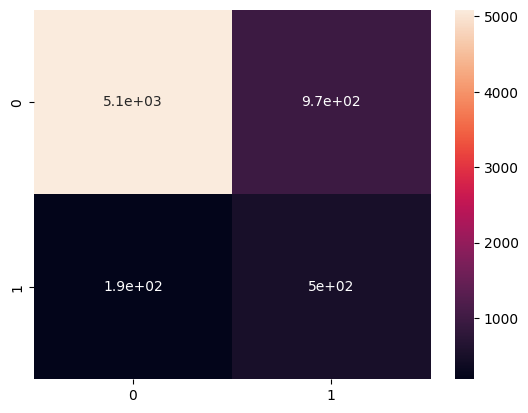

In [ ]:
# Test : classification report...
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
print("Classification Report : \n", classification_report(y_test, y_pred))

### **Model Optimization...**

In [ ]:
# Optimizing Gradient Boosting...
gbc_model = GradientBoostingClassifier()

# define the grid of hyperparameters to search...
param_grid = {
    "learning_rate": [0.01, 0.1, 0.2],
    "n_estimators": [10],
    "max_depth": [3, 5],
    # 'min_samples_split': [2, 4],
    "min_samples_leaf": [1, 3],
    "subsample": [0.8, 1.0],
    # 'max_features': [None, 'sqrt', 'log2']
}

# Initialize GridSearchCV...
grid_search = GridSearchCV(
    estimator=gbc_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=4
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5],
                         'min_samples_leaf': [1, 3], 'n_estimators': [10],
                         'subsample': [0.8, 1.0]},
             verbose=4)

In [ ]:
print("Best Score: {:.2f} %".format(grid_search.best_score_ * 100))
print("Best Parameters:", grid_search.best_params_)
model_gbc = grid_search.best_estimator_

Best Score: 82.20 %
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 10, 'subsample': 0.8}


In [ ]:
# accuracy...
pred = model_gbc.predict(X_test)
print("Accuracy : {:.2f} %".format(100 * accuracy_score(y_test, pred)))

Accuracy : 82.80 %


Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      5276
           1       0.71      0.36      0.48      1469

    accuracy                           0.83      6745
   macro avg       0.78      0.66      0.69      6745
weighted avg       0.81      0.83      0.81      6745



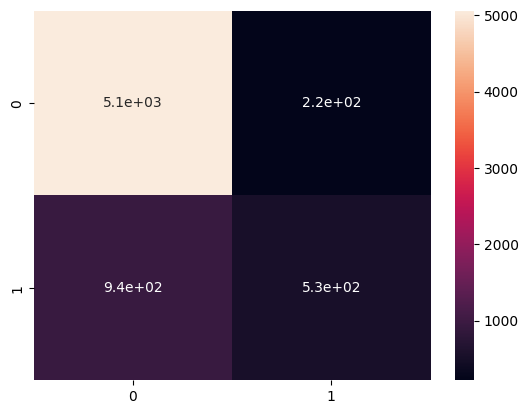

In [ ]:
# Test : classification report...
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)
print(
    "Classification Report : \n", classification_report(y_test, pred)
)  # the scores a little bit improved there is not much difference...

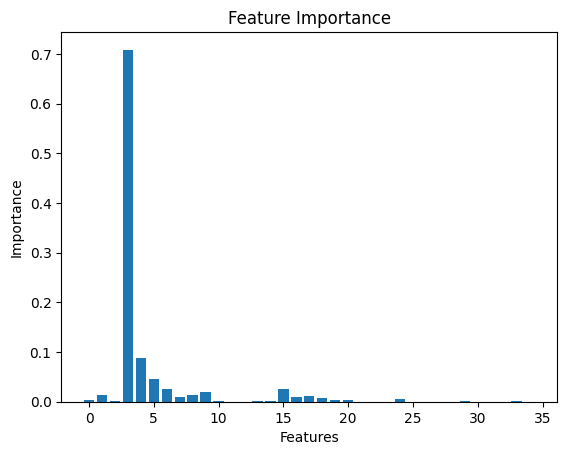

In [ ]:
# Feature importance...
feature_importance = model_gbc.feature_importances_

plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

# **Train and Evaluate an XGBoost Classifier...**

In [ ]:
# fit model...
model_xgb = xgb.XGBClassifier(
    objective="reg:squarederror", learning_rate=0.1, max_depth=5, n_estimators=100
)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='reg:squarederror', ...)

In [ ]:
# accuracy...
y_pred = model_xgb.predict(X_test)
print("Accuracy : {:.2f} %".format(100 * accuracy_score(y_pred, y_test)))

Accuracy : 82.65 %


Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      5276
           1       0.68      0.38      0.49      1469

    accuracy                           0.83      6745
   macro avg       0.76      0.67      0.69      6745
weighted avg       0.81      0.83      0.81      6745



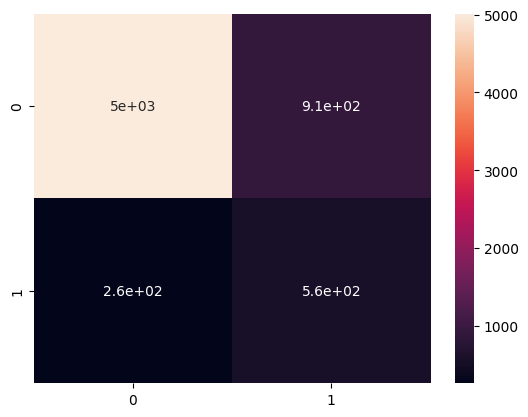

In [ ]:
# Test : classification report...
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
print("Classification Report : \n", classification_report(y_test, y_pred))

### **Model Optimization...**

In [ ]:
# Optimizing XGBoost...
param_grid = {
    "gamma": [1, 5],  # regularization parameter...
    "subsample": [0.8, 1.0],  # % of rows taken to build each tree...
    "colsample_bytree": [0.8, 1.0],  # number of columns used by each tree...
    "max_depth": [7, 5],  # depth of each tree...
    "n_estimators": [100, 300],  # no. of trees...
}

xgb_model = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.01)
grid = GridSearchCV(xgb_model, param_grid, refit=True, verbose=4)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END colsample_bytree=0.8, gamma=1, max_depth=7, n_estimators=100, subsample=0.8;, score=0.808 total time=   0.9s
[CV 2/5] END colsample_bytree=0.8, gamma=1, max_depth=7, n_estimators=100, subsample=0.8;, score=0.808 total time=   0.8s
[CV 3/5] END colsample_bytree=0.8, gamma=1, max_depth=7, n_estimators=100, subsample=0.8;, score=0.808 total time=   0.8s
[CV 4/5] END colsample_bytree=0.8, gamma=1, max_depth=7, n_estimators=100, subsample=0.8;, score=0.810 total time=   0.8s
[CV 5/5] END colsample_bytree=0.8, gamma=1, max_depth=7, n_estimators=100, subsample=0.8;, score=0.811 total time=   0.8s
[CV 1/5] END colsample_bytree=0.8, gamma=1, max_depth=7, n_estimators=100, subsample=1.0;, score=0.808 total time=   0.8s
[CV 2/5] END colsample_bytree=0.8, gamma=1, max_depth=7, n_estimators=100, subsample=1.0;, score=0.808 total time=   0.8s
[CV 3/5] END colsample_bytree=0.8, gamma=1, max_depth=7, n_estimators=100, subsample

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [1, 5],
                         'max_depth': [7, 5], 'n_estimators': [100, 300],
                         'subsample': [0.8, 1.0]},
             verbose=4)

In [ ]:
print("Best Score: {:.2f} %".format(grid.best_score_ * 100))
print("Best Parameters:", grid.best_params_)
model_xgb = grid.best_estimator_

Best Score: 82.24 %
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


In [ ]:
# accuracy...
pred = model_xgb.predict(X_test)
print("Accuracy : {:.2f} %".format(100 * accuracy_score(y_test, pred)))

Accuracy : 82.98 %


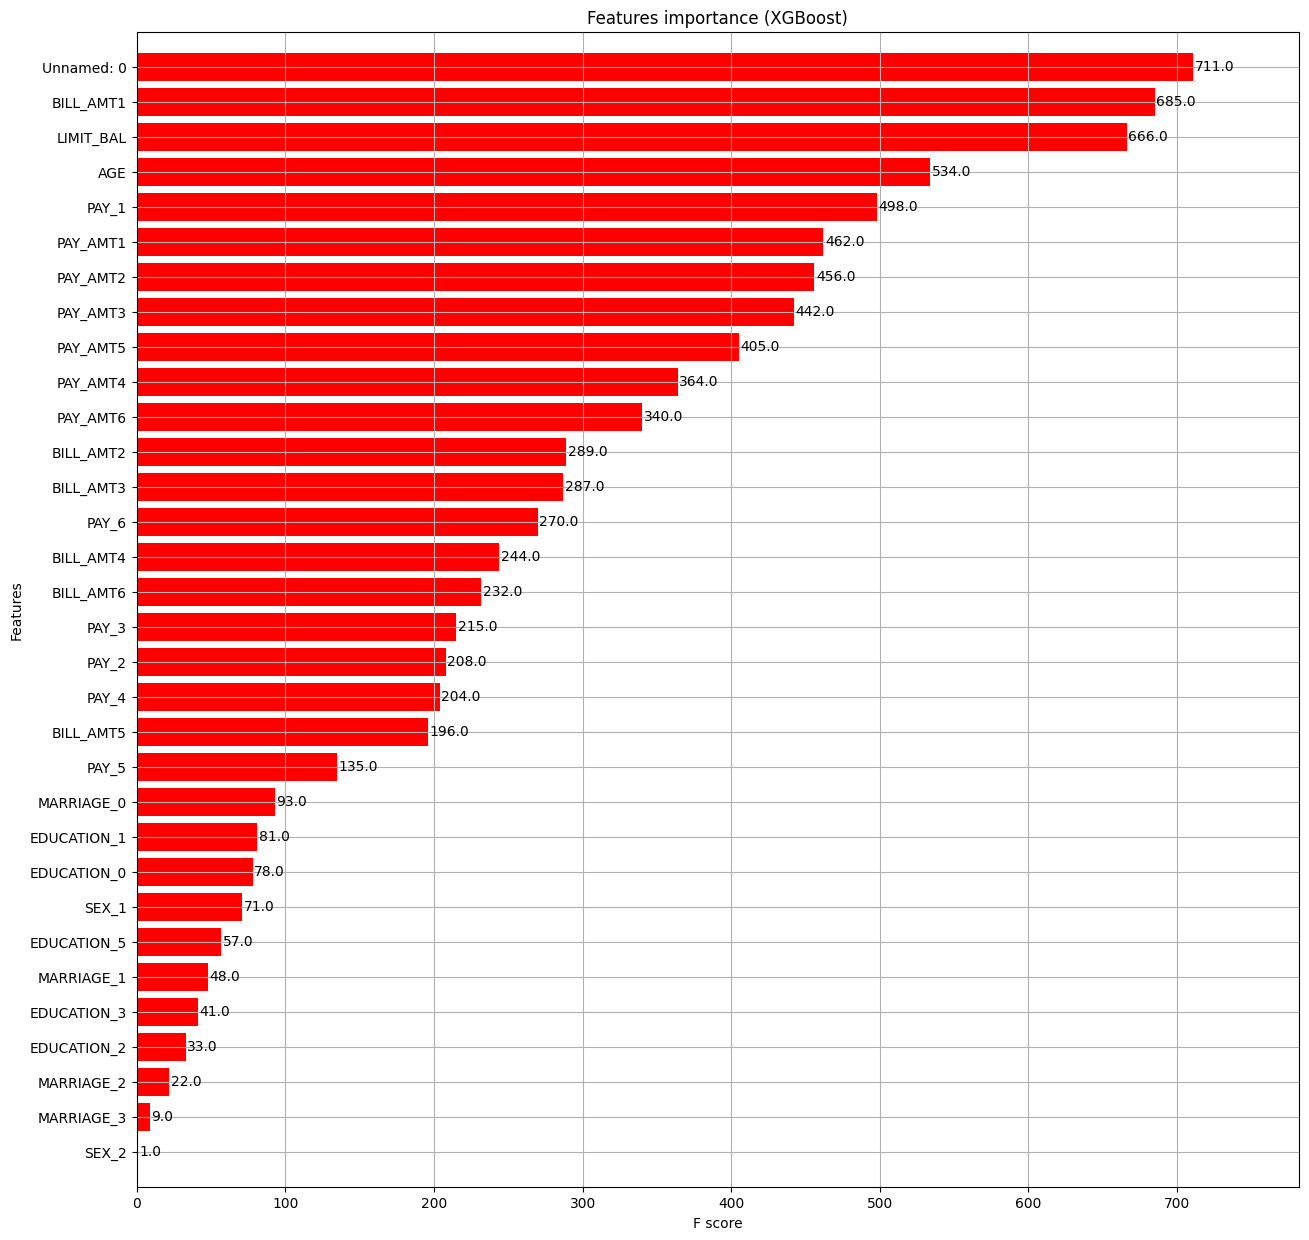

In [ ]:
fig, (ax) = plt.subplots(ncols=1, figsize=(15, 15))
xgb.plot_importance(
    model_xgb, height=0.8, title="Features importance (XGBoost)", ax=ax, color="red"
)
plt.show()

LIMIT_BAL & BILL_AMT are the most important features...

In [ ]:
"Done..."

'Done...'